# Titanic - Machine Learning from Disaster

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
import re
import warnings
print(os.listdir("./"))

['.DS_Store', 'test.csv', 'README.md', 'train.csv', '.ipynb_checkpoints', 'Titanic-notebook.ipynb', '.git', 'gender_submission.csv']


In [2]:
# Load training Data
train_df = pd.read_csv("train.csv")
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

891 observations for 11 variables
Variables with null values: Age, Cabin and Embarked

In [5]:
# separate numerical and categorical variables while maintaining labels
train_num = train_df[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']]
train_cat = train_df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

In [6]:
# Describe numerical data
train_num.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


## Visualizing the data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

          Survived       Age     SibSp     Parch      Fare
Survived  1.000000 -0.077221 -0.035322  0.081629  0.257307
Age      -0.077221  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307  0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

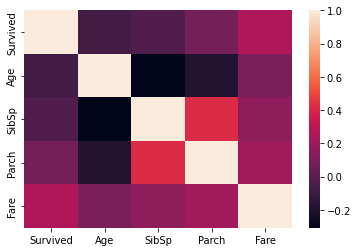

In [8]:
# Examine the correlation of numerical data
print(train_num.corr())
sns.heatmap(train_num.corr())

In [9]:
# Comparing Survival rates across numerical variables
pd.pivot_table(train_num, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [10]:
# Comparing survival rates across categorical variables
print('Survival rates across Ticket class\n',)
print(pd.pivot_table(train_cat, index = 'Survived', columns= 'Pclass', values= 'Ticket', aggfunc='count'))
print()
print('Survival rates across Gender\n')
print(pd.pivot_table(train_cat, index = 'Survived', columns= 'Sex', values= 'Ticket', aggfunc='count'))
print()
print('Survival rates across Port of Embarkation\n')
print(pd.pivot_table(train_cat, index = 'Survived', columns= 'Embarked', values= 'Ticket', aggfunc='count'))

Survival rates across Ticket class

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Survival rates across Gender

Sex       female  male
Survived              
0             81   468
1            233   109

Survival rates across Port of Embarkation

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


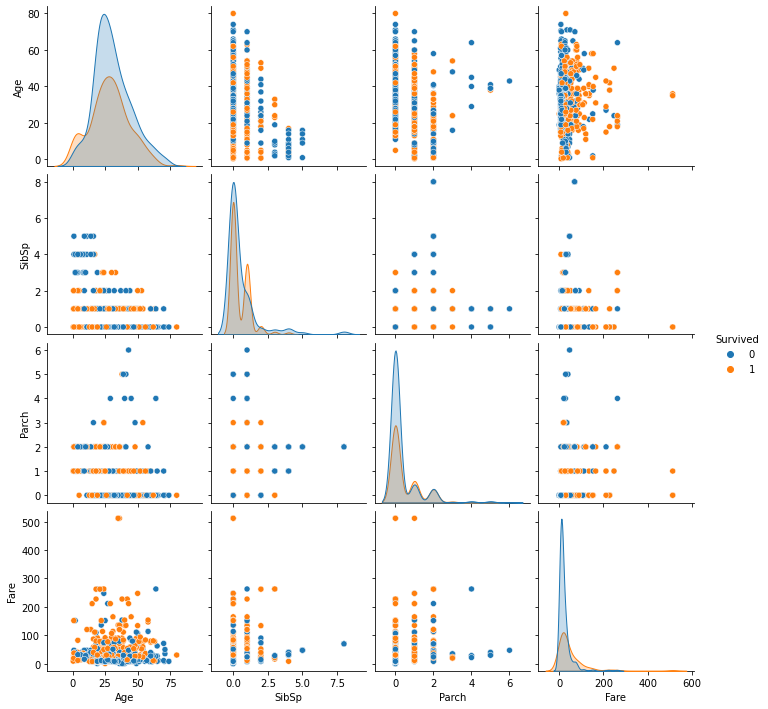

In [11]:
# Distribution and corelation plots for numerical variables
sns.pairplot(train_num, hue='Survived')
plt.show()

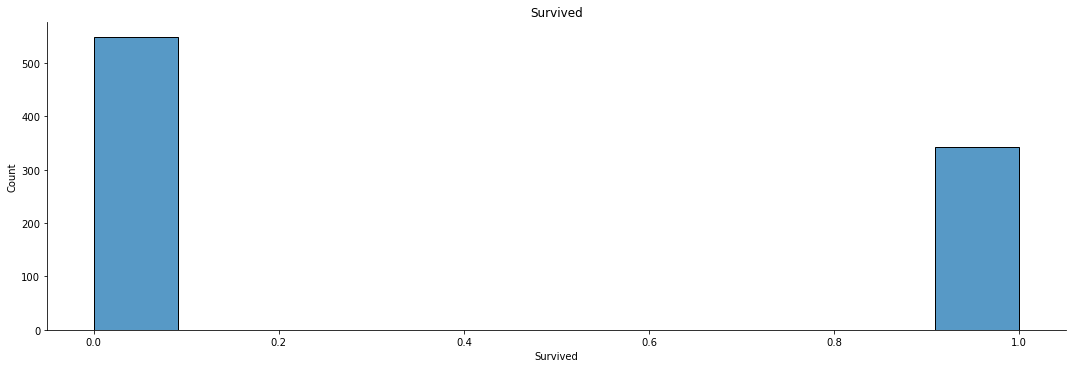

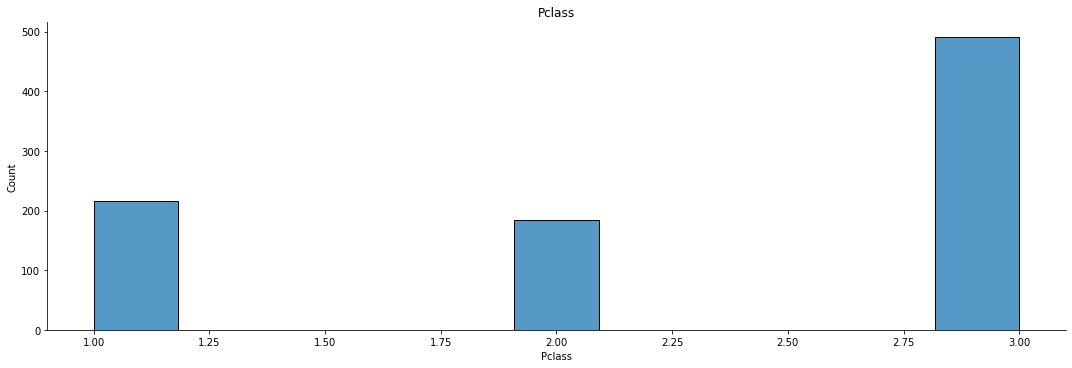

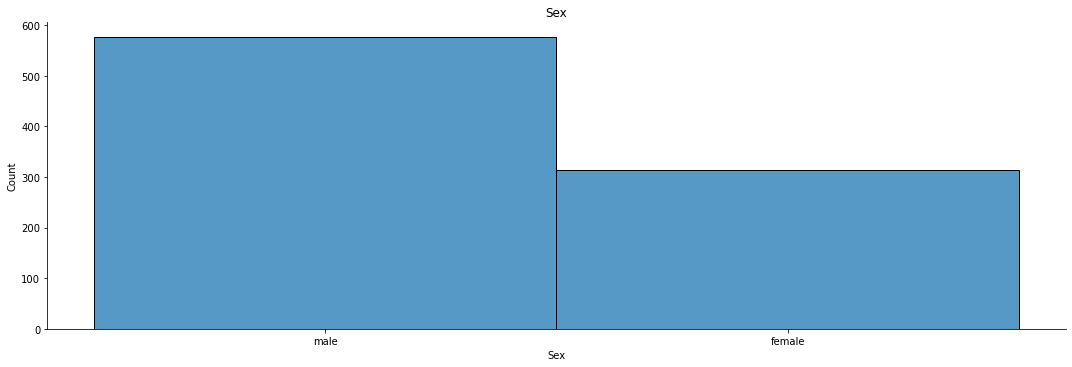

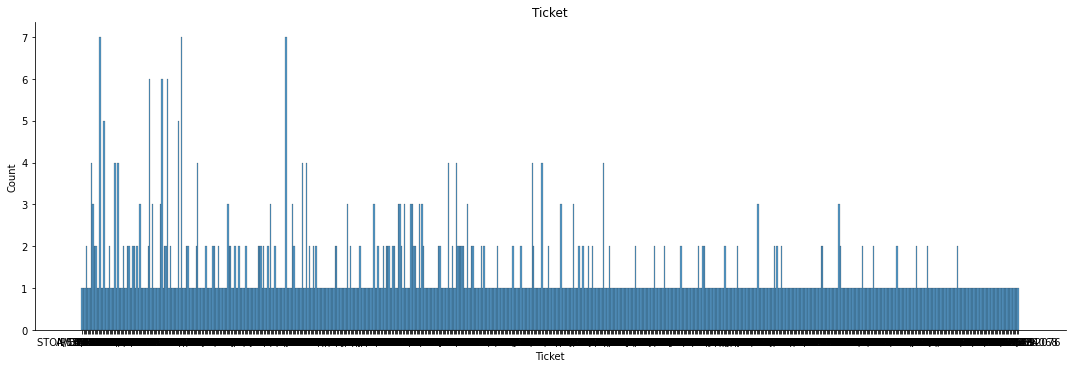

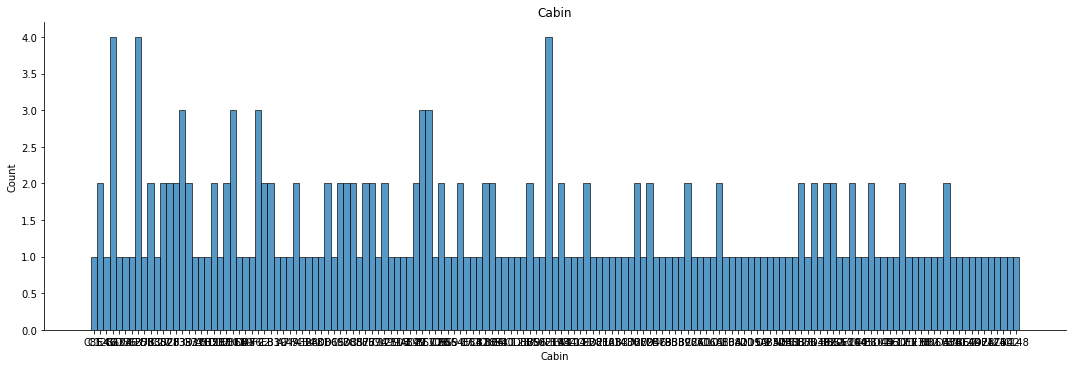

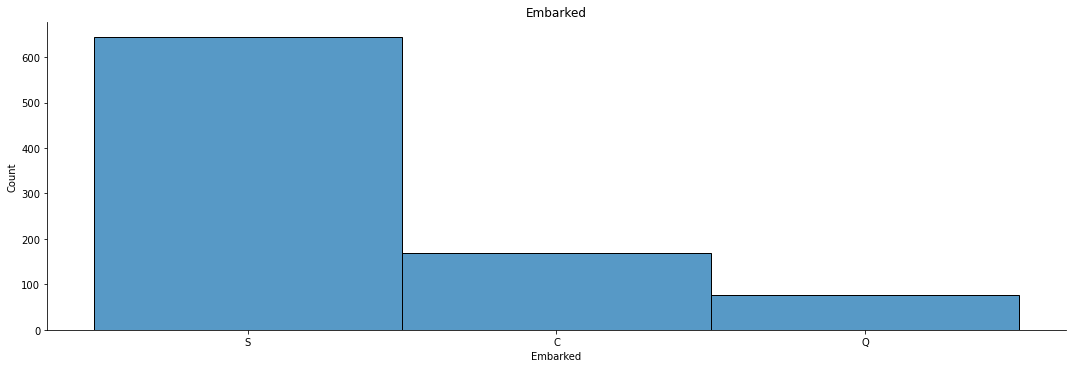

In [12]:
# Distribution Plots for categorical variables
for i in train_cat.columns:
    sns.displot(train_cat[i], aspect=3)
    plt.title(i)
    plt.show()

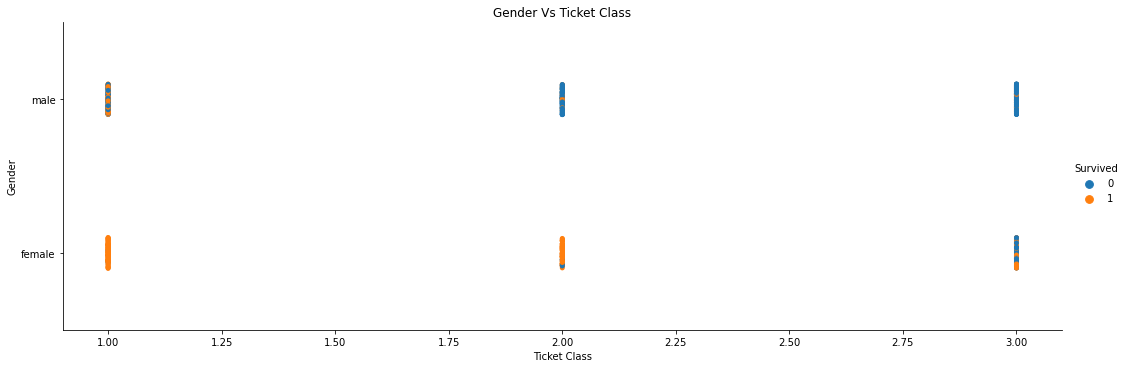

In [13]:
# We try to see how the Ticket class and Gender variables would affect the Survival.
sns.catplot(x='Pclass', y='Sex', data=train_df, hue='Survived', aspect=3)
plt.ylabel('Gender')
plt.xlabel('Ticket Class')
plt.title('Gender Vs Ticket Class')
plt.show()

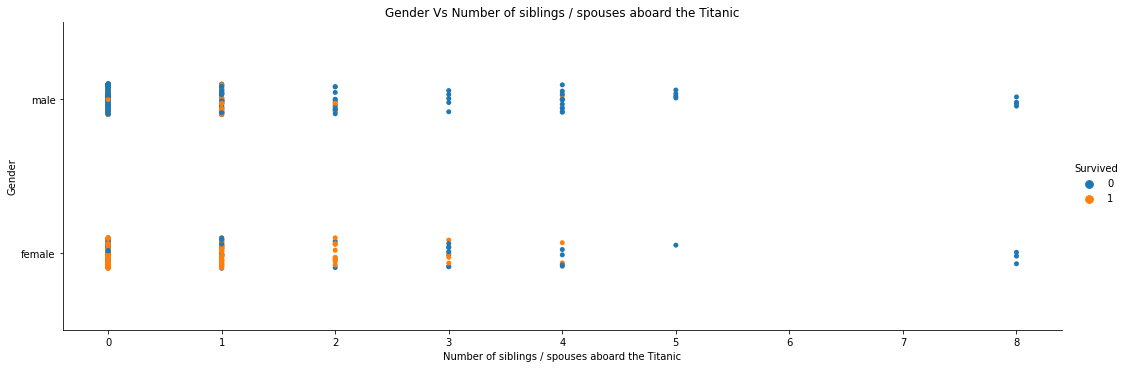

In [14]:
# We try to see how the Gender and Number of siblings / spouses aboard the Titanic variables would affect the Survival.
sns.catplot(x='SibSp', y='Sex', data=train_df, hue='Survived', aspect=3)
plt.ylabel('Gender')
plt.xlabel('Number of siblings / spouses aboard the Titanic')
plt.title('Gender Vs Number of siblings / spouses aboard the Titanic')
plt.show()

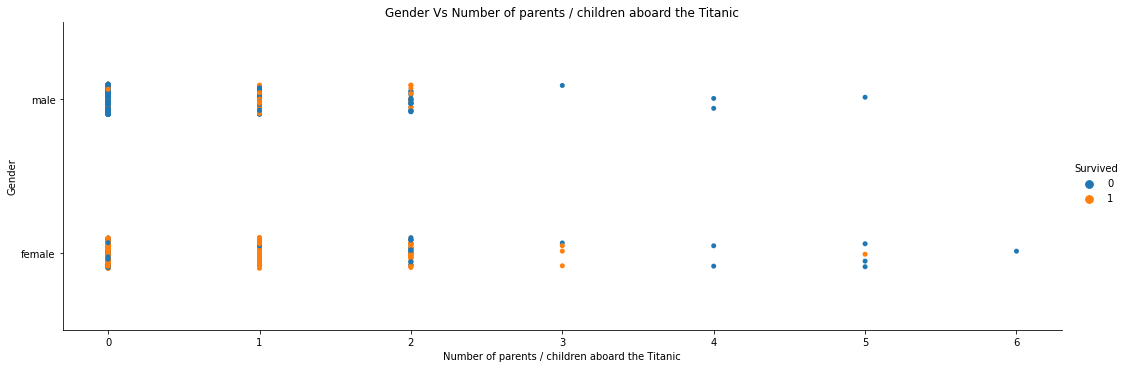

In [15]:
# We try to see how the Number of parents / children aboard the Titanic and Gender variables would affect the Survival.
sns.catplot(x='Parch', y='Sex', data=train_df, hue='Survived', aspect=3)
plt.ylabel('Gender')
plt.xlabel('Number of parents / children aboard the Titanic')
plt.title('Gender Vs Number of parents / children aboard the Titanic')
plt.show()

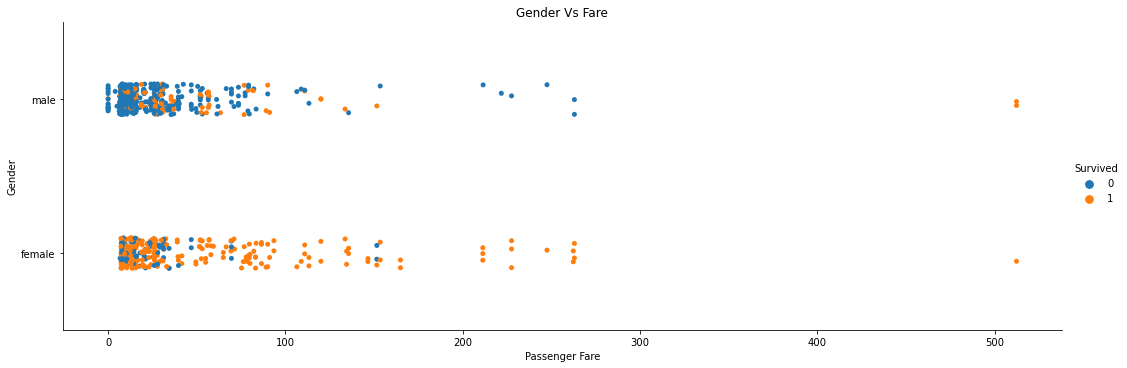

In [16]:
# We try to see how the Passenger Fare and Gender variables would affect the Survival.
sns.catplot(x='Fare', y='Sex', data=train_df, hue='Survived', aspect=3)
plt.ylabel('Gender')
plt.xlabel('Passenger Fare')
plt.title('Gender Vs Fare')
plt.show()

In [ ]:
# We try to see how the Cabin number and Gender variables would affect the Survival.
sns.catplot(x='Cabin', y='Sex', data=train_df, hue='Survived', aspect=3)
plt.ylabel('Gender')
plt.xlabel('Cabin number')
plt.title('Gender Vs Cabin number')
plt.show()

In [ ]:
# We try to see how the Port of Embarkation and Gender variables would affect the Survival.
sns.catplot(x='Embarked', y='Sex', data=train_df, hue='Survived', aspect=3)
plt.ylabel('Gender')
plt.xlabel('Port of Embarkation')
plt.title('Gender Vs Port of Embarkation')
plt.show()

In [ ]:
# We try to see how the Age in years and Gender variables would affect the Survival.
sns.catplot(x='Age', y='Sex', data=train_df, hue='Survived', aspect=3)
plt.ylabel('Gender')
plt.xlabel('Age in years')
plt.title('Gender Vs Age in years')
plt.show()